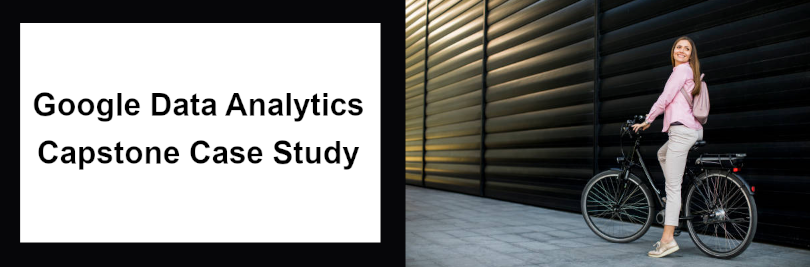

&emsp;My journey through the Google Data Analystics certificate has led me to this point: my first case study! This project involves going through 12 months of data from a bike-share company based out of Chicago which has been made available via this <a href="https://ride.divvybikes.com/data-license-agreement"> license</a> at this <a href="https://divvy-tripdata.s3.amazonaws.com/index.html">link</a>. <b>TIP</b>: Downloading several files at once could be tedious, but was made trivial with the "Simple mass downloader" Chrome extension available <a href="https://chrome.google.com/webstore/detail/simple-mass-downloader/abdkkegmcbiomijcbdaodaflgehfffed"> here</a>. One could also write some python code to grab them, but this tool was more than sufficient for this task. <br>
## Before we start
&emsp;So let's set the scene. The presumption in this case study is that we are a junior data analyst on a marketing analysis team for Cyclistic, the aformentioned bike-share company.<br>

<blockquote>&emsp;In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.<br>
&emsp;Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.<br>
&emsp;Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.<br>
&emsp;Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better >understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could >affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to >identify trends. <br>
<i>-Case Study 1 Document from Google Data Analytics Course</i></blockquote>

&emsp;The director of marketing, Lily Moreno, would like to see some actionable insights from the data we have in order to drive greater annual memberships to our service by converting casual users to members. These insights will come from analyzing the difference in usage statistics between casual riders and those who are members. <br>

&emsp;We will need to make a compelling case to our stakeholders, so let's investigate our data, carefully clean it, and see what we have to work with.

## Import, Clean, Organize
&emsp;Although the certificate program doumentation recommends first opening our data files in one of the many spreadsheet programs available, this is largely unfeasible; Google Sheets will not allow the file size, and desktop spreadsheet programs (at least on ye olde laptop on which I am currently writing) struggle with the size of the files.<br>
&emsp;This being the case, I opted to instead have some fun and use an SQL server to do my initial inspection and cleaning of the data. Big Query was used quite a bit throughout the program, however again file size is a limiting factor. Thus, I used a locally hosted Microsoft SQL server. <br>
&emsp;The plan from there is to pull the data into Python dataframes and visualize it using  packages like matplotlib. This is another point of differentiation from the course; they largely used R. I quite enjoyed learning and using R and it is great in many ways, but I am a bit more comfortable with Python from prior experience and wanted to further explore the options available there.<br>
#### Initial Import and Cleaning
&emsp;SMMS (SQL Server Management Studio) has some great tools for importing .csv files. One could create a table with proper data types using queries and "LOAD DATA INFILE" but the tools are there, so we might as well use them.<br>
&emsp;Once the data has been imported, we can get to work doing a preliminary inspection of the data. For the purposes of this notebook I did use Python code to generate these tables, however the SQL queries I have used are assigned to the "sql" variable within the code. Let's go ahead and import all the packages we'll need for our Python portion of the analysis now and establish our server connection.

In [2]:
# We import several packages here which help to connect to and query our database (pyodbc, sqlalchemy, urllib), manipulate
# the data once we get it (pandas, numpy) and to visualize the data (matplotlib).
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import numpy as np
import sqlalchemy as sa
import urllib
from sqlalchemy import create_engine, event
from sqlalchemy.engine.url import URL
from sqlalchemy.sql import text

# Here we establish the engine with which we connect to our database
server = "DESKTOP-8HH2Q2A"
database = "bike_rides"
params = urllib.parse.quote_plus("DRIVER={SQL Server Native Client 11.0};"
                                     "SERVER="+server+";"
                                     "DATABASE="+database+";"
                                     "trusted_connection=yes")
    
engine = sa.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params))

With our packages imported and our server connection established, let's begin running our queries to see what we're working with. Again, it bears mentioning that these SQL queries can just be run within your choice of DBMS if you so chose.

In [32]:
# We assign our query to a variable and pass it into the pd.read_sql function
sql = """SELECT * FROM df_09_21
"""

with engine.connect() as con:
    df = pd.read_sql(sql, con=con, parse_dates={'time_s':{"format":'%H'}})
    
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,9DC7B962304CBFD8,electric_bike,2021-09-28 16:07:10,2021-09-28 16:09:54,None,None,None,None,41.89,-87.68,41.89,-87.67,casual
1,F930E2C6872D6B32,electric_bike,2021-09-28 14:24:51,2021-09-28 14:40:05,None,None,None,None,41.94,-87.64,41.98,-87.67,casual
2,6EF72137900BB910,electric_bike,2021-09-28 00:20:16,2021-09-28 00:23:57,None,None,None,None,41.81,-87.72,41.80,-87.72,casual
3,78D1DE133B3DBF55,electric_bike,2021-09-28 14:51:17,2021-09-28 15:00:06,None,None,None,None,41.80,-87.72,41.81,-87.72,casual
4,E03D4ACDCAEF6E00,electric_bike,2021-09-28 09:53:12,2021-09-28 10:03:44,None,None,None,None,41.88,-87.74,41.88,-87.71,casual


&emsp;As we can see from this limited view of the data, we have some interesting columns of data to work with:
<ul>
    <li><b>ride_id</b>: This would see to be a unique key for each ride taken.
    <li><b>rideable_type</b>: This defines the type of bike used for the ride. This may prove useful if we can garner any insights as it pertains to membership.
    <li><b>started_at</b>: This defines the day and time of the start of the ride. This variable will prove very useful for noting not only time of day trends in useage but also for trip duration when considered in tandem with the next variable.
    <li><b>ended_at</b>: This defines the ending time and day of the ride. As mentioned, this will proveful useful when analyzing trip duration, and may lend itself to some cleaning of the data as many of these values would indicate trips lasting several days.
    <li><b>start_station_name, end_station_name</b>: This is, as expected, the name of the station from which the ride was started. This, in addition to the other name/id specific references to stations, will likely not prove very useful when compared to the latitude and longitude we have access to to describe positional data
    <li><b>start_station_id, end_station_id</b>: These define unique keys for each station. However, as mentioned above, they will not prove as useful as other positional data we have.
    <li><b>start_lat, start_lng, end_lat, end_lng</b>: These values describe the latitude and longitude of both the beginning and ending of the trips. We will examine this later, likely with Tableau, in more detail.
    <li><b>member_casual</b>: This is the defining variable for our business task: whether or not the ride was taken by a member or casual rider. We will revisit this value often.
    </ul>
&emsp;Now that we've familiarized ourselves with the data's variables, we can begin to look at the quality of the data. There are quite a few null values within the data. In fact, of the original 756,147 rows of 9/21's data, only 621,150 rows do not have any null values. There is some good news, however. Some of the columns we are most interested in (rideable_type, started_at, start_lat/lng, end_lat/lng, and member_casual) do not have any null values. <br>
&emsp;There does seem to be an issue with several null values falling within the end of trip geopositional variables, though the number of these within 9/21's data is ~700 which is a comparable number all throughout the rest of the data sets, some a bit higher or lower. These nulls do bring the legitimacy of the tracking of end of trip values into question. Times exist for these values but one must ask if these values are true if the geoposition data for these trips has not been tracked appropriately. Thus I feel comfortable dropping observations with null values within the end geoposition columns.<br>
&emsp;There are a significant number of null values in the start station name and id columns (~90,000 in 9/21's data alone), however there does exist latitude and longitude for these observations. In fact, one could join all the tables and fill in station names and id's based on the shared geopositional values where the name and id is not null, however given the business task at hand this is somewhat irrelevant. The important positional value here insofar as trip starts is concerned is the geopositional data, thus I feel comfortable keeping these observations.
&emsp;In summary, we will be dropping rows in which the ending geolocation data is null

#### Calculating New Columns
&emsp;Now we can begin calculating one of the primary values we will be interested in to differentiate the riding habits of members and casuals; ride trip duration. This will also give us a variable which would make sense to analyze in regards to potential outliers.

In [6]:
# Here we query for the columns we are interested in while ignoring rows with nulls in the columns we discussed above
sql = """SELECT ride_id,
    rideable_type,
    started_at,
    ended_at,
    start_lat,
    start_lng,
    member_casual,
    DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur
FROM df_09_21
WHERE ride_id IS NOT NULL AND
    rideable_type IS NOT NULL AND
    started_at IS NOT NULL AND
    ended_at IS NOT NULL AND
    start_lat IS NOT NULL AND
    start_lng IS NOT NULL AND
    end_lat IS NOT NULL AND
    end_lng IS NOT NULL AND
    member_casual IS NOT NULL
ORDER BY trip_dur
"""

with engine.connect() as con:
    df = pd.read_sql(sql, con=con, parse_dates={'time_s':{"format":'%H'}})
    
print(df)

                 ride_id  rideable_type          started_at  \
0       35D0A35E9454B0F5  electric_bike 2021-09-29 14:51:31   
1       4A68473D329D45C9   classic_bike 2021-09-29 18:42:50   
2       448610692B74D6B7   classic_bike 2021-09-29 18:00:15   
3       4EB4634DA7EC8CC7   classic_bike 2021-09-29 17:35:46   
4       CA0E5960C9FC5B28   classic_bike 2021-09-29 17:04:41   
...                  ...            ...                 ...   
755547  A000D763372B9757    docked_bike 2021-09-17 23:26:35   
755548  8BAA2D80763C5529    docked_bike 2021-09-10 02:18:47   
755549  8765DB658EC14B0C    docked_bike 2021-09-05 10:35:16   
755550  689016313584F621    docked_bike 2021-09-05 07:05:59   
755551  BBDA8AFFE3BB3F61    docked_bike 2021-09-05 14:45:30   

                  ended_at  start_lat  start_lng member_casual  trip_dur  
0      2021-09-29 14:44:28  41.871981 -87.629701        member        -7  
1      2021-09-29 18:36:24  41.903450 -87.667747        member        -6  
2      2021-09-29 

&emsp;We can plainly see when looking at the top and bottom several rows that, when ordered by trip duration, there is some tomfoolery with the outliers. Namely, there are not only several negative and zero values, but several very large values that make no sense for our data set. Now in a true, real world setting we could possibly consult our stakeholders or someone responsible for the initial data gathering and see if any of these values make sense e.g. perhaps zero values would be explained away in some fashion. However, this is not the case so we must make due and clean the data. Thus, let's apply some statistical analysis to see how we ought to remove these outliers after we remove negative and zero values. We'll start with the mean and the standard deviation of our data while only considering values greater than zero:

In [16]:
# We are assigning multiple queries here to be run to differentiate between member and casual. The str() function is called 
# on the results for the purposes of concatenation
sql = """SELECT 
	AVG(DATEDIFF(MINUTE, started_at, ended_at)) AS average,
	STDEV(DATEDIFF(MINUTE, started_at, ended_at)) AS st_dev
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'member' = member_casual 
"""
sql2 = """SELECT 
	AVG(DATEDIFF(MINUTE, started_at, ended_at)) AS average,
	STDEV(DATEDIFF(MINUTE, started_at, ended_at)) AS st_dev
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'casual' = member_casual 
"""
with engine.connect() as con:
    df = pd.read_sql(sql, con=con, parse_dates={'time_s':{"format":'%H'}})
    df2 = pd.read_sql(sql2, con=con, parse_dates={'time_s':{"format":'%H'}})
print("Members -> Avg: " + str(df['average'][0]) + " Std Dev: " + str(df['st_dev'][0]))
print("Casuals -> Avg: " + str(df2['average'][0]) + " Std Dev: " + str(df2['st_dev'][0]))

Members -> Avg: 13 Std Dev: 19.28003657152481
Casuals -> Avg: 26 Std Dev: 145.46234093517316


Let us also find the mode:

In [17]:
# As there is no explicit mode function in SQL, we instead count the number of trips at a certain duration, then
# group by those durations and order by the counts, taking the top value
sql = """SELECT TOP 1
	DATEDIFF(MINUTE, started_at, ended_at) as trip_dur,
	COUNT(DATEDIFF(MINUTE, started_at, ended_at)) AS num_at_min
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'member' = member_casual 
GROUP BY 
	DATEDIFF(MINUTE, started_at, ended_at)
ORDER BY num_at_min DESC
"""
sql2 = """SELECT TOP 1
	DATEDIFF(MINUTE, started_at, ended_at) as trip_dur,
	COUNT(DATEDIFF(MINUTE, started_at, ended_at)) AS num_at_min
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'casual' = member_casual 
GROUP BY 
	DATEDIFF(MINUTE, started_at, ended_at)
ORDER BY num_at_min DESC
"""

with engine.connect() as con:
    df = pd.read_sql(sql, con=con, parse_dates={'time_s':{"format":'%H'}})
    df2 = pd.read_sql(sql2, con=con, parse_dates={'time_s':{"format":'%H'}})
print("The mode of member trip duration is " + str(df['trip_dur'][0]))
print("The mode of casual trip duration is " + str(df2['trip_dur'][0]))

The mode of member trip duration is 5
The mode of casual trip duration is 8


And finally let's find the median (*using the .median() function of pandas here as there is no straight forward median function in SQL for our purpose)

In [13]:
# As there is no median function in SQL I have opted to use the .median() method through pandas. One could 
# make use of the percentile_cont() function in SQL, but this was more straightforward
sql = """
SELECT 
	DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'member' = member_casual 
"""
sql2 = """
SELECT 
	DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'casual' = member_casual 
"""

with engine.connect() as con:
    df = pd.read_sql(sql, con=con, parse_dates={'time_s':{"format":'%H'}})
    df2 = pd.read_sql(sql2, con=con, parse_dates={'time_s':{"format":'%H'}})
member_median = df['trip_dur'].median()
casual_median = df2['trip_dur'].median()
print("The median trip duration for members: " + str(member_median))
print("The median trip duration for casuals: " + str(casual_median))

The median trip duration for members: 10.0
The median trip duration for casuals: 15.0


&emsp;So there we have some of our stats we'll be looking at to establish the best route to deal with outliers:
<ul>
    <li>Members
        <ul>
            <li>Average: 13
            <li>Median: 10
            <li>Mode: 5
            <li>Standard Deviation: 19.28
        </ul>
    <li>Casuals
        <ul>
            <li>Average: 26
            <li>Median: 15
            <li>Mode: 8
            <li>Standard Deviation: 145.46
        </ul>
</ul>
&emsp;With these values we can now start dealing with the obvious outliers we have within our dataset for trip durations, finalize the cleaning of the data set, and start getting into some insights and trends from the data.

#### Outliers
&emsp; As we have already see, there are some pretty extraordinary outliers within our data set that we may need to deal with as some trips seems to have durations lasting in the thousands of minutes.

Member trip duration IQR is 11.0 with Q1 of 6.0 and Q3 of 17.0
Casual trip duration IQR is 19.0 with Q1 of 9.0 and Q3 of 28.0


Text(0, 0.5, 'Number of Trips')

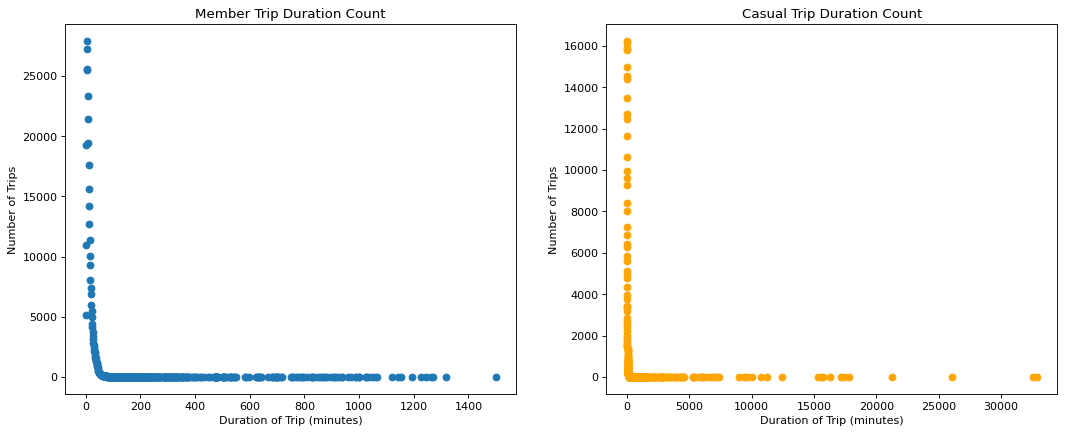

In [13]:
# Here we have assigned four queries: the first two for the purpose of finding the IQR via the numpy .percentile() method 
# and the latter two for the purpose of visualizing the distribution of trip durations across members and casuals
sql = """
SELECT 
	DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'member' = member_casual 
"""
sql2 = """
SELECT 
	DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'casual' = member_casual 
"""
sql3 = """
SELECT 
	DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur,
    COUNT(DATEDIFF(MINUTE, started_at, ended_at)) as num_trip
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'member' = member_casual 
GROUP BY DATEDIFF(MINUTE, started_at, ended_at)
ORDER BY trip_dur
"""
sql4 = """
SELECT 
	DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur,
    COUNT(DATEDIFF(MINUTE, started_at, ended_at)) as num_trip
FROM df_09_21
WHERE ride_id IS NOT NULL AND
	rideable_type IS NOT NULL AND
	started_at IS NOT NULL AND
	ended_at IS NOT NULL AND
	start_lat IS NOT NULL AND
	start_lng IS NOT NULL AND
	end_lat IS NOT NULL AND
	end_lng IS NOT NULL AND
	member_casual IS NOT NULL AND
	DATEDIFF(MINUTE, started_at, ended_at) >0 AND
	'casual' = member_casual 
GROUP BY DATEDIFF(MINUTE, started_at, ended_at)
ORDER BY trip_dur
"""
with engine.connect() as con:
    df = pd.read_sql(sql, con=con, parse_dates={'time_s':{"format":'%H'}})
    df2 = pd.read_sql(sql2, con=con, parse_dates={'time_s':{"format":'%H'}})
    df3 = pd.read_sql(sql3, con=con, parse_dates={'time_s':{"format":'%H'}})
    df4 = pd.read_sql(sql4, con=con, parse_dates={'time_s':{"format":'%H'}})

mq3, mq1 = np.percentile(df['trip_dur'], [75 ,25])
m_iqr = mq3 - mq1
cq3, cq1 = np.percentile(df2['trip_dur'], [75 ,25])
c_iqr = cq3 - cq1

print("Member trip duration IQR is " + str(m_iqr) + " with Q1 of " + str(mq1) +" and Q3 of " + str(mq3))
print("Casual trip duration IQR is " + str(c_iqr) + " with Q1 of " + str(cq1) +" and Q3 of " + str(cq3))

fig, ax = plt.subplots(1, 2, figsize=(16, 6), dpi=80)
ax[0].scatter(df3['trip_dur'], df3['num_trip'])
ax[0].set_title("Member Trip Duration Count")
ax[0].set_xlabel("Duration of Trip (minutes)")
ax[0].set_ylabel("Number of Trips")
ax[1].scatter(df4['trip_dur'], df4['num_trip'], color="orange")
ax[1].set_title("Casual Trip Duration Count")
ax[1].set_xlabel("Duration of Trip (minutes)")
ax[1].set_ylabel("Number of Trips")

&emsp;As we can see from both our various statistics and these scatter plots, the overwhelming majority of our trip durations are between 1 and 17 minutes for members and 1 and 28 minutes for casuals. This might not be as clear in the visuals, however, as the outliers are quite large. Now I would be tempted to use the IQR to eliminate outliers 1.5 * IQR above Q3, but there does exist a day pass for our customers and these are valid trips. Being that our data set does not include whether a single ride pass or a full-day pass was used, it would be best to simply account for this and limit our data to trips lasting between 1 and 1440 minutes (24 hours). Note that one could re-run the above code and add in a "DATEDIFF(MINUTE, started_at, ended_at) <=1440" to the WHERE clause to reduce the data set. <br>
&emsp;Now, the majority of outliers, at least within 9/21's data, resided within the casuals. When using 1440 minutes as a cap within 9/21, there were only 2 outliers in members, with 103 casual outliers. When re-running the above code, largely the only statistic to change is the standard deviation of casuals - everything else is either the same or very nearly the same. Choosing this cap is also benefitial for consistency across month's of data, as we would otherwise be best calculating things like the IQR for each month or join all the months and find it for all the data as a whole but this might be troublesome as weather/temperature definitely play a role and each month's data is best considered separately.<br>
&emsp;Now that we have cleaned our data, gotten the columns we want, and dealt with outliers, let's apply these filters to our data and create our new tables. We will also create two new columns: the start time's hour e.g. 6:45PM -> 06 PM, and a numeric value for the month. We will do this to aid in figuring out what the most popular start times are for trips and for some eventual comparisons based on months.

In [72]:
# Here we are assigning the names of the tables we are selecting from and the new table names (df_xx_xx and cl_xx_xx
# respectively) and looping through them in tandem with the zip function in the same SQL statement
raw_tables = [
    'df_09_21',
    'df_10_21',
    'df_11_21',
    'df_12_21',
    'df_01_22',
    'df_02_22',
    'df_03_22',
    'df_04_22',
    'df_05_22',
    'df_06_22',
    'df_07_22',
    'df_08_22'
]
clean_tables = [
    'cl_09_21',
    'cl_10_21',
    'cl_11_21',
    'cl_12_21',
    'cl_01_22',
    'cl_02_22',
    'cl_03_22',
    'cl_04_22',
    'cl_05_22',
    'cl_06_22',
    'cl_07_22',
    'cl_08_22'
]

# I am also using a different method to connect to the database so I can commit changes and create the tables

conn = pyodbc.connect('Driver={SQL Server Native Client 11.0};'
                      'Server=DESKTOP-8HH2Q2A;'
                      'Database=bike_rides;'
                      'Trusted_Connection=yes;')

cursor = conn.cursor()
for x, y in zip(raw_tables, clean_tables):
    cursor.execute("""
    SELECT 
        ride_id,
        rideable_type,
        FORMAT(started_at, 'hh tt') as starttime_hour,
        FORMAT(started_at, 'MM') AS trip_month,
        started_at,
        ended_at,
        start_lat,
        start_lng,
        member_casual,
        DATEDIFF(MINUTE, started_at, ended_at) AS trip_dur
    INTO """ + y + """
    FROM """ + x + """
    WHERE ride_id IS NOT NULL AND
        rideable_type IS NOT NULL AND
        started_at IS NOT NULL AND
        ended_at IS NOT NULL AND
        start_lat IS NOT NULL AND
        start_lng IS NOT NULL AND
        end_lat IS NOT NULL AND
        end_lng IS NOT NULL AND
        member_casual IS NOT NULL AND
        DATEDIFF(MINUTE, started_at, ended_at) >0 AND
        DATEDIFF(MINUTE, started_at, ended_at) <= 1440""")

    conn.commit()


## Ready - Set - Analyze!
&emsp;Now that we have cleaned our data, established the values that we are interested in, and dealt with outliers in a reasonable fashion, we can finally begin actually anayzing our data in earnest, identifying trends, and getting to the brass tax of the business task we set out for in the first place. First up, let's look at the distribution of the number of trips across the start times for all the months.

In [11]:


%%html 
<div class='tableauPlaceholder' id='viz1665710781234' style='position: relative'><noscript><a href='#'><img alt='trips per hour ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CaseStudy-TripsperHour&#47;tripsperhour&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CaseStudy-TripsperHour&#47;tripsperhour' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CaseStudy-TripsperHour&#47;tripsperhour&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665710781234');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1100px';vizElement.style.height='527px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1100px';vizElement.style.height='527px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

&emsp;As shown in these charts, approximately 5PM is the most popular start time between both types of members throughout the entire year, with a separate mini-peak in activity for members around 8AM, likely due to their use case being transport to work. We can also see, and should likely have expected to see, casual use drops off drastically in the colder months, November through March seeing the most significant disparity. <br>
&emsp;Now let's at the average trip length between members ans casuals in each month. We will use the UNION operator in SQL along with subqueries to accomplish this.

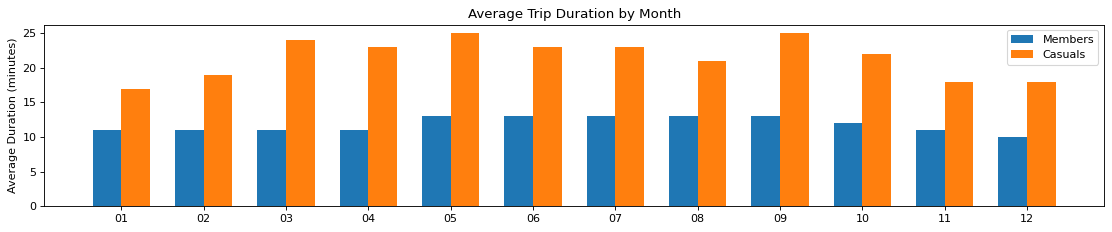

In [88]:
with engine.connect() as con:
        df = pd.read_sql("""
    SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_09_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_09_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_09_21
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_10_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_10_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_10_21
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_11_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_11_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_11_21
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_12_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_12_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_12_21
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_01_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_01_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_01_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_02_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_02_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_02_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_03_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_03_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_03_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_04_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_04_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_04_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_05_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_05_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_05_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_06_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_06_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_06_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_07_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_07_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_07_22
UNION
SELECT trip_month,
    (SELECT AVG(trip_dur)
	FROM cl_08_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT AVG(trip_dur)
	FROM cl_08_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_08_22
GROUP BY trip_month
ORDER BY trip_month
    """, con=con)

x = np.arange(len(df['trip_month']))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 3), dpi=80)
rects1 = ax.bar(x - width/2, df['member_avg'], width, label='Members')
rects2 = ax.bar(x + width/2, df['casual_avg'], width, label='Casuals')
ax.set_xticks(x, df['trip_month'])
ax.legend()
ax.set_title("Average Trip Duration by Month")
ax.set_ylabel("Average Duration (minutes)")
fig.tight_layout()

&emsp;Although average trip duration does increase slightly in warmer months for both types of riders, there is no significant insight gained from this. In fact, this should be an expected outcome as we have already seen while working on outliers that the overwhelming majority of trips tend to be shorter. We could instead look at total minutes of trip duration per rider type over the year as well as the number of trips.

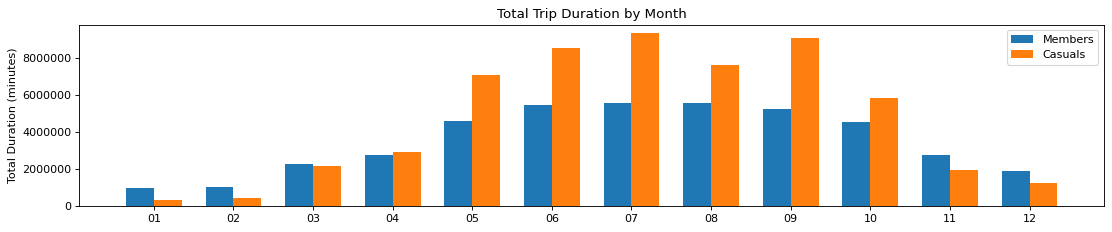

In [92]:
with engine.connect() as con:
        df = pd.read_sql("""
    SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_09_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_09_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_09_21
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_10_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_10_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_10_21
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_11_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_11_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_11_21
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_12_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_12_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_12_21
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_01_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_01_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_01_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_02_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_02_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_02_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_03_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_03_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_03_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_04_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_04_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_04_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_05_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_05_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_05_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_06_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_06_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_06_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_07_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_07_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_07_22
UNION
SELECT trip_month,
    (SELECT SUM(trip_dur)
	FROM cl_08_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT SUM(trip_dur)
	FROM cl_08_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_08_22
GROUP BY trip_month
ORDER BY trip_month
    """, con=con)

x = np.arange(len(df['trip_month']))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 3), dpi=80)
rects1 = ax.bar(x - width/2, df['member_avg'], width, label='Members')
rects2 = ax.bar(x + width/2, df['casual_avg'], width, label='Casuals')
ax.set_xticks(x, df['trip_month'])
ax.legend()
ax.set_title("Total Trip Duration by Month")
ax.set_ylabel("Total Duration (minutes)")
ax.ticklabel_format(axis='y', style='plain')
fig.tight_layout()

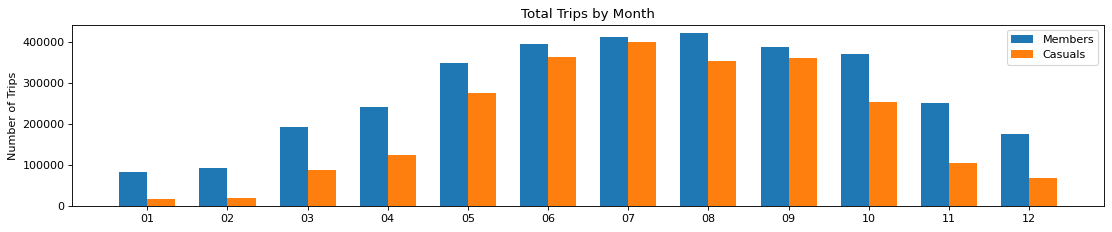

In [93]:
with engine.connect() as con:
        df = pd.read_sql("""
    SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_09_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_09_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_09_21
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_10_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_10_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_10_21
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_11_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_11_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_11_21
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_12_21
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_12_21
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_12_21
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_01_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_01_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_01_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_02_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_02_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_02_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_03_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_03_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_03_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_04_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_04_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_04_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_05_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_05_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_05_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_06_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_06_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_06_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_07_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_07_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_07_22
UNION
SELECT trip_month,
    (SELECT COUNT(trip_dur)
	FROM cl_08_22
	WHERE 'member' = member_casual) AS member_avg,
	(SELECT COUNT(trip_dur)
	FROM cl_08_22
	WHERE 'casual' = member_casual) AS casual_avg
FROM cl_08_22
GROUP BY trip_month
ORDER BY trip_month
    """, con=con)

x = np.arange(len(df['trip_month']))
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 3), dpi=80)
rects1 = ax.bar(x - width/2, df['member_avg'], width, label='Members')
rects2 = ax.bar(x + width/2, df['casual_avg'], width, label='Casuals')
ax.set_xticks(x, df['trip_month'])
ax.legend()
ax.set_title("Total Trips by Month")
ax.set_ylabel("Number of Trips")
ax.ticklabel_format(axis='y', style='plain')
fig.tight_layout()

We should also look at the differences in usage across weekdays.

In [14]:
%%html
<div class='tableauPlaceholder' id='viz1665711904493' style='position: relative'><noscript><a href='#'><img alt='trips per weekday ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Tr&#47;TripsperWeekday&#47;tripsperweekday&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TripsperWeekday&#47;tripsperweekday' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Tr&#47;TripsperWeekday&#47;tripsperweekday&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665711904493');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='750px';vizElement.style.height='527px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='750px';vizElement.style.height='527px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Another interesting and differentiating metric might be how useage differs by bike type over the year.

In [30]:
%%html
<div class='tableauPlaceholder' id='viz1665754325921' style='position: relative'><noscript><a href='#'><img alt='by rideable type ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Tr&#47;TripsbyType&#47;byrideabletype&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TripsbyType&#47;byrideabletype' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Tr&#47;TripsbyType&#47;byrideabletype&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665754325921');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='800px';vizElement.style.height='627px';} else { vizElement.style.width='100%';vizElement.style.height='727px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Now then, let us go ahead and merge all the cleaned tables and create a master .csv file which we can use to upload to Tableau Public and make use of the geolocation data to explore trends based on time and month.

In [5]:
sql = """
SELECT * 
FROM cl_09_21
UNION
SELECT * 
FROM cl_10_21
UNION
SELECT * 
FROM cl_11_21
UNION
SELECT * 
FROM cl_12_21
UNION
SELECT * 
FROM cl_01_22
UNION
SELECT * 
FROM cl_02_22
UNION
SELECT * 
FROM cl_03_22
UNION
SELECT * 
FROM cl_04_22
UNION
SELECT * 
FROM cl_05_22
UNION
SELECT * 
FROM cl_06_22
UNION
SELECT * 
FROM cl_07_22
UNION
SELECT * 
FROM cl_08_22
"""

with engine.connect() as con:
        df = pd.read_sql(sql, con=con)
df.to_csv("master_clean.csv", index=False)

In [29]:
%%html
<div class='tableauPlaceholder' id='viz1665754066042' style='position: relative'><noscript><a href='#'><img alt='Dashboard 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CaseStudy1_16655396701890&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CaseStudy1_16655396701890&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CaseStudy1_16655396701890&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1665754066042');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## Findings
&emsp;Now we start seeing the picture; our members tend to have shorter but much more trips, whereas our casual riders tend to have less, but longer trips, roughly twice as long on average in fact. We can also see quite conretely the seasonal effect on the number of and duration of trips. From January to June there is ~300% increase in the number of trips by members,  while during the same period casual ridership grew by twenty times. The most noticeable shift in ridership in casual riders is going into May, while the steepest drop-off was going into November. This would indicate that insofar as these levels indicate a trend on a year to year basis, the most effective time to begin ramping up advertising the benefits of membership to this base would be in April and furthermore then advertising could ramp back down in October. We should also see that casual riders peak activity is during the weekend, further reinforcing the notion that much of casual rider trips are more leisure based.<br>
&emsp;One might note that when considering the above heat maps for casual riders during the month of April, there is a very high concentration of casual riders in a few areas in the early afternoon, beginning around 11 AM and peaking around 5 PM. If there is to be any physical advertising done for membership benefits, this high activity area would be the area to consider. <br>
&emsp;One might make the case to a casual rider that given the frequency and length of trips they take during the more climate months, it would be savings in the long term to get a membership. The current economical climate being what it is, money savings must be a high priority to draw them into a membership. We could also make the case not only about saving money compared to being a casual rider, but could be used for shorter trips in lieu of public transportation or solo-driving. This same point could also be driven home with the lowered carbon footprint enabled by using this type of transport more frequently which then cycles back to the money they could save by being a member. 
&emsp;Digital media would be a fantastic outlet for advertising to these casual riders. If we have any email or SMS info, we could send out information outlining the above points. Social media would also be an assett in trying to reach out casual audience. Temporary reduced membership costs could be offered when casual ridership starts to fall off at the end of the year to entice them to join as well. <br>
&emsp;Given the proclivity of casual riders to use their trips for leisure, predominantly on weekends, we could also partner with any local social media pages or groups to try to gain traction for places which would be suitable to ride a bike for leisure, e.g. bike trails, parks, scenic areas, etc. This could even be timed promotion coinciding with the weekend.<br>
&emsp;Finally it may be helpful to look at the difference in usage as it pertains to the tupe of bicycle, both across membership and over a monthly period. It would appear that for the sum total of the year, casual riders do prefer electric bikes which would even further drive home the point that casual riders tend towards leisure for the purpose of their rides, whereas classic bikes are preferable for members which could indicate a large portion of health conscious members which could prove useful in further advertising and data collecting.  As for actionable insights, if financially feasible it may prove worthwhile to have a larger suppy of electric bikes in the areas where casual riders are more prevalent. <br>
&emsp;In summary, with the above data and aforementioned insights it would seem that recommendations would include the following:
<ul>
    <li>Given casual rider activity trends throughout the year, it would prove most useful to ramp up advertising to casual riders as spring begins and it would make sense to taper off advertising as fall gets underway. 
    <li>Social media posts, partnered perhaps with local groups and organizations which deal in leisure activities, outdoor events, and environmental groups would make sense, particularly when timed for the weekend.
    <li>To garner goodwill and exposure, we could do a membership giveaway in which participants earn more giveaways for social media shares across Twitter, Facebook, etc, following our social media outlets, and the like. This would allow for potential social media retention/reach while getting exposure particularly for the value of a membership.
    <li>There is a large portion of electric riders in the casual sector, higher than classic as a sum total for the year. It may be prudent to ensure higher availability of electric bikes in areas indicated in the above heatmap where casual riders are clustered most. 
    <li>Further data could be collected to learn if any stations sit empty of bikes for any period of time. This may allow us further insights on ideal placement/viability of further stations.